In [1]:
import json
import time
from utils import *
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Business understanding - dataset explorations

### Pandas - Polars comparison

In [3]:
# installing and importing polars
!pip install polars
import polars as pl

In [41]:
# function to track time and avoid code repetition as we test several commands
def track_time(commands):
    for command_name, command in commands.items():
        start_time = time.time()

        command()

        end_time = time.time()
        duration = end_time - start_time

        print(f"{command_name} executed in: {duration:.4f} seconds")

In [72]:
# defining our test scenarios
df_pd = pd.DataFrame()
df_pl = pl.DataFrame()

def command1():
    df_pd = pd.read_csv('data/BEA04.20230506T200502.csv')

def command2():
    df_pl = pl.read_csv('data/BEA04.20230506T200502.csv')

def command3():
    df_pd.head()
    
def command4():
    df_pl.head()

preliminary_commands = {
    "Pandas.read_csv": command1,
    "Polars.read_csv": command2,
    "Pandas.head": command3,
    "Polars.head": command4
}

In [73]:
def command5():
    df_pd.groupby('Type of Building and Construction')['VALUE'].agg('mean')

def command6():
    df_pl.groupby(pl.col('Type of Building and Construction')).agg([pl.mean('VALUE')])
    
def command7():
    df_pd.sort_values('VALUE')
    
def command8():
    df_pl.sort('VALUE')
    
def command9():
    df_pd[df_pd['VALUE'] > 100]

def command10():
    # df_pl[df_pl['VALUE'] > 100] this command didn't work and couldn't find solution online due to smaller community
    df_pl.filter(pl.col('VALUE') > 100)
    
data_manipulation = {
    "Pandas - groupby": command5,
    "Polars - groupby": command6,
    "Pandas - sort": command7,
    "Polars - sort": command8,
    "Pandas - filter": command9,
    "Polars - filter": command10
}

In [69]:
# compare
track_time(preliminary_commands)

Pandas.read_csv executed in: 0.0040 seconds
Polars.read_csv executed in: 0.0020 seconds
Pandas.head executed in: 0.0000 seconds
Polars.head executed in: 0.0000 seconds


In [75]:
df_pd = pd.read_csv('data/BEA04.20230506T200502.csv')
df_pl = pl.read_csv('data/BEA04.20230506T200502.csv')
track_time(data_manipulation)

Pandas - groupby executed in: 0.0010 seconds
Polars - groupby executed in: 0.0000 seconds
Pandas - sort executed in: 0.0000 seconds
Polars - sort executed in: 0.0010 seconds
Pandas - filter executed in: 0.0000 seconds
Polars - filter executed in: 0.0010 seconds


### Production index

In [21]:
production = pd.read_csv('data/BEA04.20230506T200502.csv')
production.head()

,Statistic Label,Year,Type of Building and Construction,UNIT,VALUE
0,Value of Production Index in Building and Cons...,2000,All building and construction,Base 2015=100,155.852221
1,Value of Production Index in Building and Cons...,2000,Building (excluding civil engineering),Base 2015=100,199.844255
2,Value of Production Index in Building and Cons...,2000,Residential building,Base 2015=100,311.698160
3,Value of Production Index in Building and Cons...,2000,Non-residential building,Base 2015=100,121.431248
4,Value of Production Index in Building and Cons...,2000,Civil engineering,Base 2015=100,63.619979


In [3]:
production['Statistic Label'].unique()

array(['Value of Production Index in Building and Construction',
       'Volume of Production Index in Building and Construction',
       'Value of Production Index in Building and Construction (Seasonally Adjusted)',
       'Volume of Production Index in Building and Construction (Seasonally Adjusted)'],
      dtype=object)

In [22]:
prod_volume = production[production['Statistic Label']=='Volume of Production Index in Building and Construction']

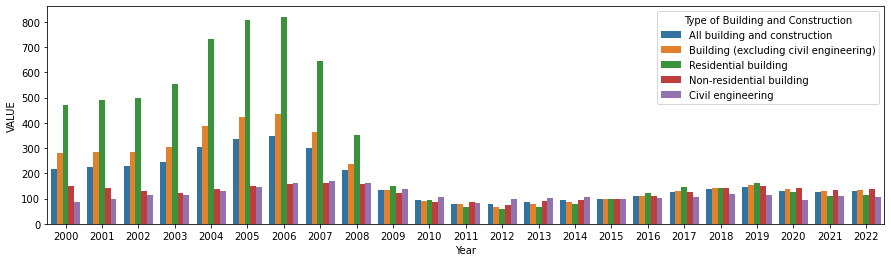

In [5]:
sns.barplot(data=prod_volume, y='VALUE', x='Year', hue='Type of Building and Construction');
plt.gcf().set_figwidth(15)

### Index of employment

Downloading json file using REST request and processing the data in a not-csv format

In [108]:
import requests

# CSO URL dataset
url = 'https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/BBA02/JSON-stat/2.0/en'

# Download the file and save it to the current directory
response = requests.get(url)
with open('BBA02.json', 'w', encoding='utf-8') as f:
    f.write(response.text)
    
# Load the JSON file 
file = 'BBA02.json'
with open(file, 'r', encoding='utf-8') as f:
    file_str = f.read()
    
data = json.loads(file_str)
data.keys() # checking json structure

dict_keys(['class', 'dimension', 'extension', 'href', 'id', 'label', 'link', 'note', 'role', 'size', 'updated', 'value', 'version'])

In [109]:
# let's explore the shape of this file to identify needed values
data['dimension'].keys()

dict_keys(['STATISTIC', 'C02196V02652', 'TLIST(A1)'])

In [8]:
data['dimension']['TLIST(A1)']

{'category': {'index': ['1975',
   '1976',
   '1977',
   '1978',
   '1979',
   '1980',
   '1981',
   '1982',
   '1983',
   '1984',
   '1985',
   '1986',
   '1987',
   '1988',
   '1989',
   '1990',
   '1991',
   '1992',
   '1993',
   '1994',
   '1995',
   '1996',
   '1997',
   '1998',
   '1999',
   '2000',
   '2001',
   '2002',
   '2003',
   '2004',
   '2005',
   '2006',
   '2007',
   '2008'],
  'label': {'1975': '1975',
   '1976': '1976',
   '1977': '1977',
   '1978': '1978',
   '1979': '1979',
   '1980': '1980',
   '1981': '1981',
   '1982': '1982',
   '1983': '1983',
   '1984': '1984',
   '1985': '1985',
   '1986': '1986',
   '1987': '1987',
   '1988': '1988',
   '1989': '1989',
   '1990': '1990',
   '1991': '1991',
   '1992': '1992',
   '1993': '1993',
   '1994': '1994',
   '1995': '1995',
   '1996': '1996',
   '1997': '1997',
   '1998': '1998',
   '1999': '1999',
   '2000': '2000',
   '2001': '2001',
   '2002': '2002',
   '2003': '2003',
   '2004': '2004',
   '2005': '2005',
   '20

In [110]:
pindex = pd.json_normalize(data['dimension']['TLIST(A1)']['category']['label'])
pindex.head(10)

,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008


In [111]:
pindex = pindex.T

In [112]:
values = data['value']
values

[133.2,
 128.1,
 134.8,
 147.0,
 158.8,
 156.1,
 152.9,
 135.6,
 110.7,
 101.1,
 87.1,
 75.7,
 64.9,
 60.5,
 66.7,
 72.2,
 69.8,
 68.4,
 64.3,
 65.9,
 68.8,
 74.4,
 81.4,
 88.5,
 94.2,
 100.0,
 101.7,
 99.3,
 99.8,
 103.2,
 107.0,
 109.6,
 107.5,
 90.7]

In [113]:
pindex['value'] = values
pindex.head()

,0,value
1975,1975,133.2
1976,1976,128.1
1977,1977,134.8
1978,1978,147.0
1979,1979,158.8


In [114]:
pindex.columns = ['Year', 'Value']

In [115]:
pindex.head()

,Year,Value
1975,1975,133.2
1976,1976,128.1
1977,1977,134.8
1978,1978,147.0
1979,1979,158.8


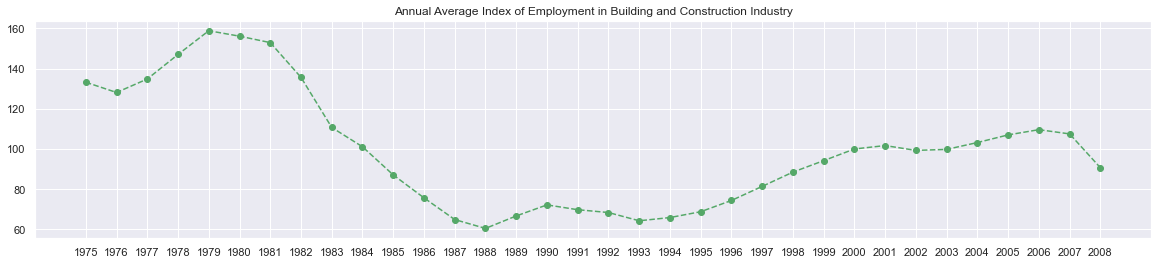

In [121]:
plt.plot(pindex['Year'], pindex['Value'], 'go--');
plt.xticks(pindex['Year'].values)
plt.title('Annual Average Index of Employment in Building and Construction Industry')
plt.gcf().set_figwidth(20)

### Enterprises

In [3]:
ent = pd.read_csv('data/BAA12.20230506T200513.csv')
ent.head()

,Statistic Label,Year,Nace Rev 2 Activity,UNIT,VALUE
0,Construction Enterprises,2008,Development of building projects (411),Number,2416.0
1,Construction Enterprises,2008,Construction of residential and non-residentia...,Number,13876.0
2,Construction Enterprises,2008,Construction of roads and railways (421),Number,1027.0
3,Construction Enterprises,2008,Construction of utility projects (422),Number,322.0
4,Construction Enterprises,2008,Construction of other civil engineering projec...,Number,381.0


In [18]:
print(ent['Statistic Label'].unique())
print('---------')
print(ent['Nace Rev 2 Activity'].unique())
print('---------')
print(ent['UNIT'].unique())
print('---------')
print(ent['Year'].unique())

['Construction Enterprises' 'Employees - Manual' 'Employees - Other'
 'Employees - Total'
 'Persons Engaged - Proprietors and Unpaid Family Workers'
 'Persons Engaged - Labour only subcontract basis'
 'Persons Engaged - Total' 'Wages and Salaries - Manual Employees'
 'Wages and Salaries - Other Employees'
 'Wages and Salaries - Manual and Other Employees'
 'Wages and Salaries - Labour only subcontractors'
 'Wages and Salaries - Total' 'Labour Costs - Other'
 'Labour Costs - Total' 'Turnover - Principal' 'Turnover - Subcontractor'
 'Turnover - Manufacturing' 'Turnover - Factored goods' 'Turnover - Other'
 'Turnover - Total' 'Payments to other subcontractors'
 'Turnover less payments to subcontractors' 'Assets made for own use'
 'Purchases - Materials and energy' 'Purchases - Industrial services'
 'Purchases - Factored goods' 'Purchases - Other goods/services'
 'Purchases - Total' 'Stocks at end of year - Work in progress'
 'Stocks at end of year - Unsold finished work'
 'Stocks at end o

Nace Rev.2 classification system ref: https://www.gov.ie/en/service/search-nace-coder/

## 1.2 Dashboard
Ref: https://dash.plotly.com/workspaces/using-dash-in-jupyter-and-workspaces - https://realpython.com/python-dash/

In [19]:
#!pip install dash

In [20]:
#!pip install jupyter-dash

In [4]:
# needed libraries
import plotly.express as px
import plotly.graph_objects as go
import dash
from jupyter_dash import JupyterDash
from plotly.graph_objects import Layout

##### Create figures

In [8]:
ent.head()

,Statistic Label,Year,Nace Rev 2 Activity,UNIT,VALUE
0,Construction Enterprises,2008,Development of building projects (411),Number,2416.0
1,Construction Enterprises,2008,Construction of residential and non-residentia...,Number,13876.0
2,Construction Enterprises,2008,Construction of roads and railways (421),Number,1027.0
3,Construction Enterprises,2008,Construction of utility projects (422),Number,322.0
4,Construction Enterprises,2008,Construction of other civil engineering projec...,Number,381.0


In [5]:
enterprises = ent[ent['Nace Rev 2 Activity'] != 'Construction (41 to 43)'] # removing global class

In [26]:
# defining a function to centralize the grid style 
# (the plan is to add all those figure to the dashboard so we want the same style)
def update_axes(f):
    f.update_xaxes(
    mirror=True,
    showline=True,
    linecolor='lightgrey',
    gridcolor='lightgrey'
    )
    f.update_yaxes(
    mirror=True,
    showline=True,
    linecolor='lightgrey',
    gridcolor='lightgrey'
    )
    f.show()

In [18]:
fig = px.bar(enterprises, x='VALUE', y='Nace Rev 2 Activity', title='Number of construction enterprises', 
             animation_frame="Year", color_discrete_sequence =['green'])#color='VALUE')
fig.update_layout(
    title=dict(x=0.5), #set title in the center
    margin=dict(l=300, r=20, t=60, b=20), #set margin of the chart
    plot_bgcolor='white'
)
update_axes(fig)

--------------------------------

In [11]:
wages = enterprises.loc[enterprises['Statistic Label']=='Wages and Salaries - Total']

In [19]:
fig1 = px.line(wages, x="Year", y='VALUE', color="Nace Rev 2 Activity", title="Wages")
fig1.update_layout(
    xaxis_tickangle=30,#angle of the tick on x-axis
    title=dict(x=0.5), #set the title in center
    xaxis_tickfont=dict(size=9), #set the font for x-axis
    yaxis_visible=False, yaxis_showticklabels=False,
    margin=dict(l=10, r=20, t=50, b=20), #set the margin
    paper_bgcolor="#e6ffe6",#"#d7eff1", #set the background color for chart
    plot_bgcolor='white'
)
update_axes(fig1)

----------------------

In [23]:
# calculate and save the total for each contruction type for plotting
prod_volume['total'] = prod_volume.groupby('Type of Building and Construction')['VALUE'].transform('sum')

In [25]:
fig2 = px.scatter(
    prod_volume, #dataframe
    x="Year",
    y="Type of Building and Construction",
    size="VALUE", #bubble size
    color="total",#bubble color
    color_continuous_scale=px.colors.sequential.Emrld, #Plotly3, #color theme
    title="Production volume by construction type",
)
fig2.update_layout(
    xaxis_tickangle=30,#angle of the tick on x-axis
    title=dict(x=0.5), #set the title in center
    xaxis_tickfont=dict(size=9), #set the font for x-axis
    yaxis_tickfont=dict(size=9), #set the font for y-axis
    margin=dict(l=100, r=20, t=50, b=20), #set the margin
    paper_bgcolor="#e6ffe6", #set the background color for chart
    plot_bgcolor='white'
)
update_axes(fig2)

-------------------------

In [34]:
all_data = ent.loc[ent['Nace Rev 2 Activity']=='Construction (41 to 43)']
all_data.drop(columns=['Nace Rev 2 Activity'], inplace=True)

##### Configure dash application

In [35]:
from dash import html,  dcc, callback, Output, Input, dash_table

In [36]:
# 👷‍♂️ unicode= U+1F477 U+200D U+2642 U+FE0F - https://www.freecodecamp.org/news/all-emojis-emoji-list-for-copy-and-paste/

In [37]:
app = JupyterDash(__name__)

app.layout = html.Div(
    children=[
        html.Div(
            children=[
                html.P(children='👷‍♂️', style={'fontSize':'30px','textAlign':'center',"border-top": "thin lightgreen solid"}),
                html.H1(children="Construction in Ireland", style={"fontSize": "48px","text-align": "center",
                                                           "border-bottom": "thin lightgreen solid"})
            ]#, style={'background-color':'#e6ffcc'}
        ),
        html.Div(
            children=dcc.Graph( id = 'bar', figure = fig ),
             style={'width': '80%', 'display': 'inline-block', 'padding-left':'10%'}
        ),
        html.Div(
            children=dcc.Graph( id = 'scatter', figure = fig2 ),
             style={'width': '45%', 'display': 'inline-block'}
        ),
        html.Div(
            children=dcc.Graph( id = 'scatter', figure = fig1 ),
             style={'width': '55%', 'display': 'inline-block'}
        ),
        html.Div([
            dcc.Tabs(id='tabs', value='Employees - Total', children=[ #https://dash.plotly.com/dash-core-components/tabs
                dcc.Tab(label='Employees', value='Employees - Total'),
                dcc.Tab(label='Labour Costs', value='Labour Costs - Total'),
                dcc.Tab(label='Turnover', value='Turnover - Total'),
                dcc.Tab(label='Persons Engaged', value='Persons Engaged - Total'),
                dcc.Tab(label='Production value', value='Production value'),
                dcc.Tab(label='Intermediate consumption', value='Intermediate consumption')
            ]),
            dcc.Graph(figure={}, id='graph'),
            html.P(children='All values', style={'fontSize':'20px','textAlign':'center',
                                                 "border-top": "thin lightgrey dotted", "background-color":"#e6ffe6"}),
            #https://dash.plotly.com/datatable/filtering
            dash_table.DataTable(
                columns=[
                    {'name': 'Statistic Label', 'id': 'Statistic Label', 'type': 'text'},
                    {'name':'Nace Rev 2 Activity', 'id':'Nace Rev 2 Activity', 'type':'text'},
                    {'name': 'Year', 'id': 'Year', 'type': 'numeric'},
                    {'name': 'VALUE', 'id': 'VALUE', 'type': 'numeric'}
                ],
                data=ent.to_dict('records'),
                page_size=10,
                filter_action='native'),
        ])
    ]
)

# Add controls to build the interaction
@app.callback(
    Output(component_id='graph', component_property='figure'),
    Input(component_id='tabs', component_property='value')
)
def update_graph(value_chosen):
    data = all_data.loc[all_data['Statistic Label']==str(value_chosen)]
    fig = px.bar(data, x='Year', y='VALUE', color_discrete_sequence =['green'])
    fig.update_layout(
        plot_bgcolor='#e6ffe6'
    )
    return fig

In [38]:
if __name__ == '__main__':
    app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/

Dash app running on http://127.0.0.1:8050/


## 2. Feature selection and EDA

We want to predict wages and salaries, we'll keep the total values for the following classes:<br>
		○ Persons Engaged - Total
		○ Employees - Total
		○ Construction Enterprises
		○ Wages and Salaries - Total
		○ Labour Costs - Total
		○ Turnover - Total
		○ Purchases - Total
		○ Stocks at end of year - Total
		○ Stock changes - Total
        ○ Production value
        ○ Intermediate consumption

In [21]:
labels = ['Persons Engaged - Total', 'Employees - Total', 'Construction Enterprises', 'Wages and Salaries - Total', 
        'Labour Costs - Total', 'Turnover - Total', 'Purchases - Total', 'Stocks at end of year - Total', 
        'Stock changes - Total', 'Production value', 'Intermediate consumption']

In [22]:
df = ent[ent['Statistic Label'].isin(labels)]

In [23]:
df = df[df['Nace Rev 2 Activity'] == 'Construction (41 to 43)']

In [24]:
df.drop(columns=['Nace Rev 2 Activity', 'UNIT'], inplace=True)

In [25]:
df.head()

,Statistic Label,Year,VALUE
9,Construction Enterprises,2008,61905.0
19,Construction Enterprises,2009,57472.0
29,Construction Enterprises,2010,52607.0
39,Construction Enterprises,2011,50256.0
49,Construction Enterprises,2012,49530.0


In [26]:
pivoted_df = df.pivot(index='Year', columns='Statistic Label', values='VALUE').reset_index()
pivoted_df.columns.name = None
pivoted_df.head()

,Year,Construction Enterprises,Employees - Total,Intermediate consumption,Labour Costs - Total,Persons Engaged - Total,Production value,Purchases - Total,Stock changes - Total,Stocks at end of year - Total,Turnover - Total,Wages and Salaries - Total
0,2008,61905.0,145740.0,24623781.0,7383211.0,190069.0,35619219.0,NaN,NaN,NaN,38090615.0,6248254.0
1,2009,57472.0,96249.0,15860338.0,5464978.0,134313.0,19955700.0,NaN,NaN,NaN,24070238.0,4631607.0
2,2010,52607.0,69777.0,12219217.0,3764831.0,104545.0,14049112.0,NaN,NaN,NaN,17712899.0,3161945.0
3,2011,50256.0,61197.0,11662303.0,2748647.0,94640.0,13532292.0,NaN,NaN,NaN,15577448.0,2336554.0
4,2012,49530.0,55736.0,4652157.0,2471185.0,89351.0,7903454.0,NaN,NaN,NaN,8797406.0,2134799.0


In [27]:
# null values
pivoted_df.isnull().sum()

Year                              0
Construction Enterprises          0
Employees - Total                 0
Intermediate consumption          0
Labour Costs - Total              0
Persons Engaged - Total           0
Production value                  0
Purchases - Total                 7
Stock changes - Total            12
Stocks at end of year - Total    12
Turnover - Total                  0
Wages and Salaries - Total        0
dtype: int64

In [28]:
# 7 years are missing for purchases and 12 for stocks, we can't replace those values so we drop
pivoted_df.drop(columns=['Purchases - Total', 'Stock changes - Total', 'Stocks at end of year - Total'], inplace=True)

In [29]:
# rename columns
new_columns = {col: col.replace(' - Total', '') for col in pivoted_df.columns if ' - Total' in col}
pivoted_df = pivoted_df.rename(columns=new_columns)

In [30]:
df = pivoted_df
df.head()

,Year,Construction Enterprises,Employees,Intermediate consumption,Labour Costs,Persons Engaged,Production value,Turnover,Wages and Salaries
0,2008,61905.0,145740.0,24623781.0,7383211.0,190069.0,35619219.0,38090615.0,6248254.0
1,2009,57472.0,96249.0,15860338.0,5464978.0,134313.0,19955700.0,24070238.0,4631607.0
2,2010,52607.0,69777.0,12219217.0,3764831.0,104545.0,14049112.0,17712899.0,3161945.0
3,2011,50256.0,61197.0,11662303.0,2748647.0,94640.0,13532292.0,15577448.0,2336554.0
4,2012,49530.0,55736.0,4652157.0,2471185.0,89351.0,7903454.0,8797406.0,2134799.0


In [31]:
df.dtypes

Year                          int64
Construction Enterprises    float64
Employees                   float64
Intermediate consumption    float64
Labour Costs                float64
Persons Engaged             float64
Production value            float64
Turnover                    float64
Wages and Salaries          float64
dtype: object

In [32]:
df.shape

(12, 9)

### Descriptive statistics

In [33]:
df.describe()

,Year,Construction Enterprises,Employees,Intermediate consumption,Labour Costs,Persons Engaged,Production value,Turnover,Wages and Salaries
count,12.000000,12.000000,12.000000,1.200000e+01,1.200000e+01,12.000000,1.200000e+01,1.200000e+01,1.200000e+01
mean,2013.500000,53649.250000,86280.666667,1.359787e+07,4.664794e+06,122745.666667,1.994079e+07,2.087905e+07,4.043069e+06
std,3.605551,4784.809849,27608.160455,6.258127e+06,1.800556e+06,31001.597593,9.219013e+06,9.241868e+06,1.564053e+06
min,2008.000000,47349.000000,55736.000000,4.652157e+06,2.471185e+06,89351.000000,7.903454e+06,8.797406e+06,2.095563e+06
25%,2010.750000,50074.500000,65694.750000,9.378899e+06,3.359578e+06,98555.000000,1.391991e+07,1.476059e+07,2.955597e+06
50%,2013.500000,52087.500000,79271.500000,1.261192e+07,4.180202e+06,114530.500000,1.777958e+07,1.857055e+07,3.701916e+06
75%,2016.250000,57510.500000,99938.250000,1.685740e+07,6.107748e+06,139059.500000,2.660088e+07,2.593972e+07,5.371509e+06
max,2019.000000,61905.000000,145740.000000,2.462378e+07,7.383211e+06,190069.000000,3.561922e+07,3.809062e+07,6.327796e+06


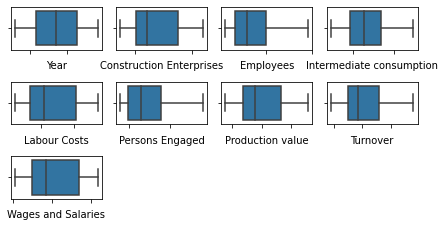

In [34]:
show_outliers(df)

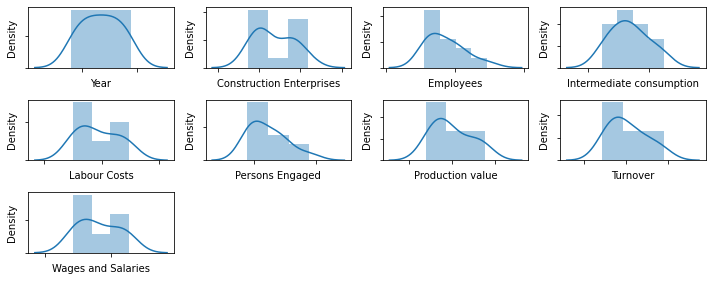

In [174]:
plt.gcf().set_figwidth(10)
plt.gcf().set_figheight(5)
show_distribution(df);

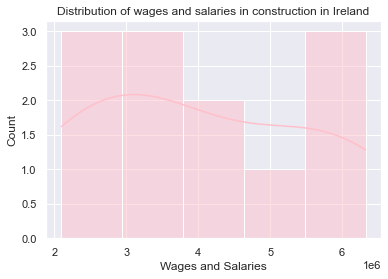

In [61]:
# focus on wages and salaries
x = df['Wages and Salaries']
ax = sns.histplot(x, kde=True, color ='pink')#, bins=6)
ax.set(title ='Distribution of wages and salaries in construction in Ireland');

Data seems to be slightly left skewed

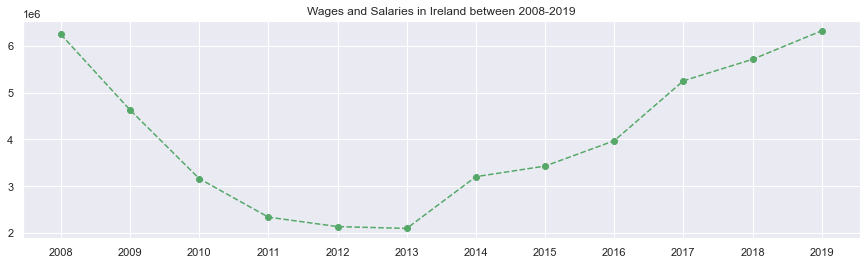

In [97]:
# visualizing trends
plt.plot(df['Year'], df['Wages and Salaries'], 'go--');
plt.xticks(df['Year'].values)
plt.title('Wages and Salaries in Ireland between 2008-2019')
plt.gcf().set_figwidth(15)

In [106]:
df[df['Year'] == 2008]

,Year,Construction Enterprises,Employees,Intermediate consumption,Labour Costs,Persons Engaged,Production value,Turnover,Wages and Salaries
0,2008,61905.0,145740.0,24623781.0,7383211.0,190069.0,35619219.0,38090615.0,6248254.0


In [83]:
df[df['Year'] == 2013]

,Year,Construction Enterprises,Employees,Intermediate consumption,Labour Costs,Persons Engaged,Production value,Turnover,Wages and Salaries
5,2013,48502.0,58059.0,5543623.0,2500802.0,91122.0,9757759.0,9996682.0,2095563.0


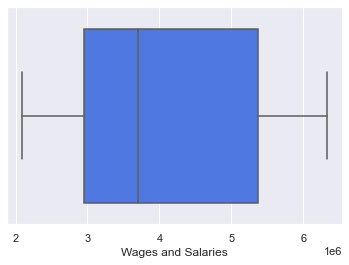

In [36]:
sns.set()
sns.set_palette('rainbow')
sns.boxplot(x);

The boxplot shows the range of data, with the middle of the data being represented by the line in the middle of the box. The first and second quartile have small spread and are much closer to the median the third and forth quartile.

In [38]:
print("Median", x.median())
print("Mean", x.mean())
print("Variance", x.var())
print("Standard deviation", x.std())

Median 3701916.0
Mean 4043069.1666666665
Variance 2446262541993.424
Standard deviation 1564053.2414190457


In [62]:
x.describe()

count    1.200000e+01
mean     4.043069e+06
std      1.564053e+06
min      2.095563e+06
25%      2.955597e+06
50%      3.701916e+06
75%      5.371509e+06
max      6.327796e+06
Name: Wages and Salaries, dtype: float64

There’s a fairly substantial difference of 341153 between the mean and the median, but the mean could be influenced a bit too much by the extreme values at either end of the data set.

In [178]:
# exporting data for modeling
df.to_csv('data.csv', index=False)

## 3. Inferential statistics

### 3.1 Wages and Employees

##### Condifence intervals
This study focuses on labour insights in the construction industry, let's find the confidence intervals for wages and salaries and employees

In [39]:
import scipy.stats as st

In [40]:
X = x.values
mean = X.mean() # central tendency
print("The mean for wages and salaries is ", mean)

The mean for wages and salaries is  4043069.1666666665


In [41]:
#create 95% confidence interval for population mean wages
# df is degrees of freedom, n-1
st.t.interval(alpha=0.95, df=len(X)-1, loc=np.mean(X), scale=st.sem(X))

(3049317.1477016974, 5036821.185631636)

In [64]:
# Method 2
import statsmodels.stats.api as sms
sms.DescrStatsW(X).tconfint_mean()

(3049317.1477016974, 5036821.185631636)

The real average wages are aproximatly between 3049317.15 ; 5036821.18<br>
The population mean is within the interval [3049317.1477016974 ; 5036821.185631636]

In [42]:
Y = df['Employees'].values
mean2 = Y.mean()
print("The mean for employees is ", mean2)

The mean for employees is  86280.66666666667


In [44]:
st.t.interval(alpha=0.95, df=len(Y)-1, loc=np.mean(Y), scale=st.sem(Y))

(68739.27839080717, 103822.05494252617)

The average of employees in the construction industry between 2008 and 2019 is aproximately between 68739.28 and 103822.05

##### T-test
We will use T-test to verify the following two hypothesis:
- The wages in Ireland were in average 50K
- The wages in Ireland were below 50K

In [184]:
# test is a T test as we are dealing with a sample, we have no info on population
#H0: u = 50000
#H1: u =! 50000
#stats.ttest_1samp(X,mu of H0)
stat,pval = st.ttest_1samp(X,50000)
print("p value: %.8f" % pval)
print("statistic: %.8f" % stat)

if pval <0.05:
    print("Reject null hypothesis of average wage equal to 50k")
else:
    print("Accept null hypothesis")

p value: 0.00000249
statistic: 8.84394277
Reject null hypothesis of average wage equal to 50k


We reject H0 ---> We accept H1, so there is enough evidence to say that the average salary is not 50k yearly.

In [185]:
# salary less than 50k with 5% significance level
#H0: u< 50000 - H1: u > 50000
st.t.sf(8.84394276569307, 4) # stat value and sample-1

# this is like using the app with x = the previous p-value and degrees of freedom

0.0004512304787227154

In [186]:
# tryin on a sample of 7 years
st.t.sf(8.84394276569307, 6) # stat value and sample-1

5.808437460126158e-05

### 3.2 Population - Type of Building and Construction

##### Anova condition: populations are independent

In [123]:
# create a pivot table with building type as rows and columns
new_df = pd.pivot_table(prod_volume, index='Year', columns='Type of Building and Construction', values='VALUE', aggfunc='sum', fill_value=0)
new_df.head()

Type of Building and Construction,All building and construction,Building (excluding civil engineering),Civil engineering,Non-residential building,Residential building
Year,,,,,
2000,218.511371,281.101536,86.995464,148.331141,471.867763
2001,225.911260,285.804647,97.619197,142.109021,490.854547
2002,230.597401,283.545855,112.695598,131.465891,499.107398
2003,243.651383,302.644320,114.217758,123.097826,554.673970
2004,305.568852,385.670168,129.698609,139.329466,731.633429


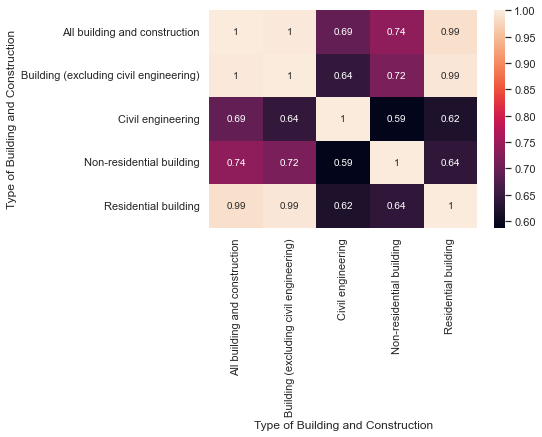

In [124]:
sns.heatmap(new_df.corr(), annot=True);

Removing All building values, looks like some features are correlated (ex: Residential Building&Building)

In [125]:
# take 10 sample from each construction type
df_sample = prod_volume.groupby(['Type of Building and Construction'], group_keys=False).apply(lambda x: x.sample(10))

#checking that there are 5 selected from each type
df_sample.groupby(['Type of Building and Construction']).count()

,Statistic Label,Year,UNIT,VALUE,total
Type of Building and Construction,,,,,
All building and construction,10,10,10,10,10
Building (excluding civil engineering),10,10,10,10,10
Civil engineering,10,10,10,10,10
Non-residential building,10,10,10,10,10
Residential building,10,10,10,10,10


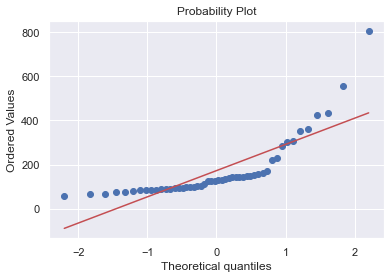

In [193]:
#Normality plot. Our variable is "VALUE"
st.probplot(df_sample.VALUE, plot=plt);

In [ ]:
# data doesn't that close to the red line. Another test to see if the data is normally distributed is Shapiro-wilk test

##### Anova condition: populations have a normal distribution

In [194]:
#Shapiro wilk test all groups
shapiro_wilk(df_sample['VALUE'])

ShapiroResult(statistic=0.6815476417541504, pvalue=3.918051660889432e-09)
Ha(Rejected): Sample is not from a normal distribution


In [ ]:
# let's double check picking two groups: residential and not residential

In [195]:
residential = prod_volume.VALUE[prod_volume['Type of Building and Construction'] == 'Residential building']
non_residential = prod_volume.VALUE[prod_volume['Type of Building and Construction'] == 'Non-residential building']

In [196]:
shapiro_wilk(residential)

ShapiroResult(statistic=0.8021119832992554, pvalue=0.00041424116352573037)
Ha(Rejected): Sample is not from a normal distribution


In [197]:
shapiro_wilk(non_residential)

ShapiroResult(statistic=0.9117869734764099, pvalue=0.044549282640218735)
Ha(Rejected): Sample is not from a normal distribution


##### Anova condition: variance of k normal distributions are equal
As our distribution is not normal, we can't continue with this test. For the sake of showing the process, we will assume data is normal and run Levene test
- H0 : The variances between the construction types are equal
- H1: The variances between the construction types are not equal

In [198]:
from scipy.stats import levene

In [199]:
levene(residential, non_residential, center='mean')

LeveneResult(statistic=76.83912990143656, pvalue=3.297585839995814e-11)

In [ ]:
# greater than alpha, variances are equal